In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
import seaborn as sns

Does the llm take on average more steps than the human?

In [105]:
# load the data data/llm_paths_all_gpt4omini_no_memory.tsv
llm_paths_all_gpt4omini_no_memory = pd.read_csv('data/llm_paths_all_gpt4omini_no_memory.tsv', sep='\t')

# filter out the rows with 0 steps
llm_paths_all_gpt4omini_no_memory = llm_paths_all_gpt4omini_no_memory[llm_paths_all_gpt4omini_no_memory['steps'] > 0]
# describe the data
llm_paths_all_gpt4omini_no_memory['steps'].describe()

count    14527.000000
mean         3.661527
std          1.612817
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         16.000000
Name: steps, dtype: float64

In [106]:
# load the data data/paths_finished_unique.tsv
paths_finished = pd.read_csv('data/paths_finished_unique.tsv', sep='\t')

# get the number of steps in the finished paths
paths_finished['path_length'] = paths_finished['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished['path_length'].describe()

count    28718.000000
mean         5.672749
std          5.017178
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        434.000000
Name: path_length, dtype: float64

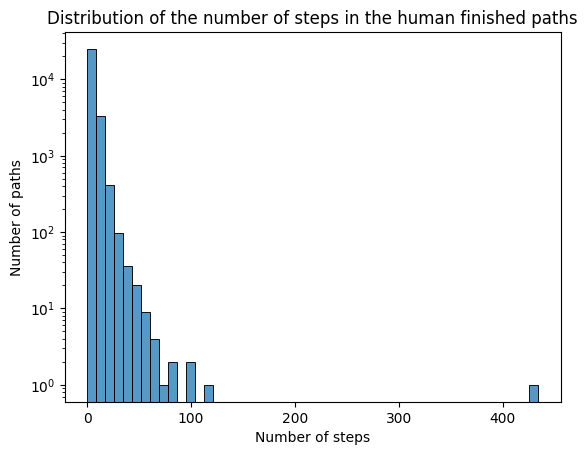

In [107]:
# plot the distribution of the number of steps in the finished paths
llm_paths_all_gpt4omini_no_memory['path_length'] = llm_paths_all_gpt4omini_no_memory['path'].apply(lambda x: len(x.split(';')) - 1)
sns.histplot(paths_finished['path_length'], bins=50)
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.title('Distribution of the number of steps in the human finished paths')
plt.yscale('log')

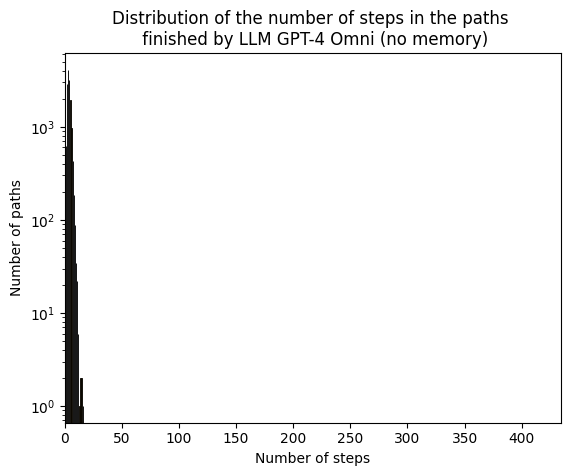

In [108]:
sns.histplot(llm_paths_all_gpt4omini_no_memory['path_length'], color='orange', bins=50)
plt.xlim(0, paths_finished['path_length'].max())
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.title('Distribution of the number of steps in the paths \n finished by LLM GPT-4 Omni (no memory)')
plt.yscale('log')

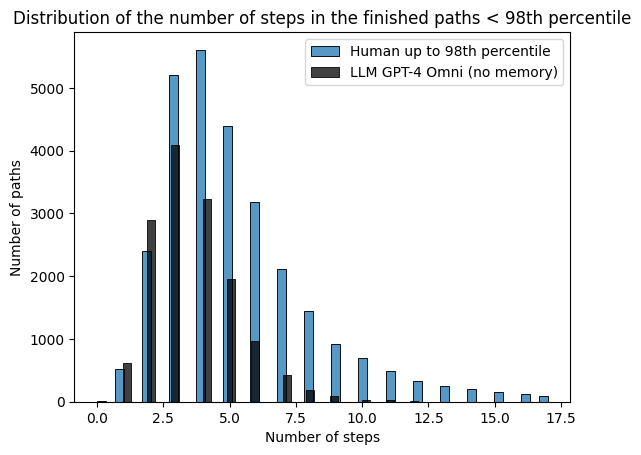

In [109]:
# get the 98th percentile of the number of steps in the finished paths
percentile_98 = np.percentile(paths_finished['path_length'], 98)

# get the number of steps in the finished paths that are less than the 98th percentile
paths_finished_lt_98 = paths_finished[paths_finished['path_length'] < percentile_98]
sns.histplot(paths_finished_lt_98['path_length'], bins=50, label='Human up to 98th percentile')
sns.histplot(llm_paths_all_gpt4omini_no_memory['path_length'], bins=50, color='black', label='LLM GPT-4 Omni (no memory)')
plt.title('Distribution of the number of steps in the finished paths < 98th percentile')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.legend()
plt.show()

In [110]:
# take only the path_id that are in the 2 datasets
# create a mask using the past_id column
mask = paths_finished['path_id'].isin(llm_paths_all_gpt4omini_no_memory['path_id'])
paths_finished_filtered = paths_finished[mask]


# get the number of steps in the filtered paths
paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')) - 1)
paths_finished_filtered['path_length'].describe()


/tmp/ipykernel_86620/3328009033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paths_finished_filtered['path_length'] = paths_finished_filtered['path'].apply(lambda x: len(x.split(';')) - 1)


count    14527.000000
mean         4.747505
std          4.764334
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        434.000000
Name: path_length, dtype: float64

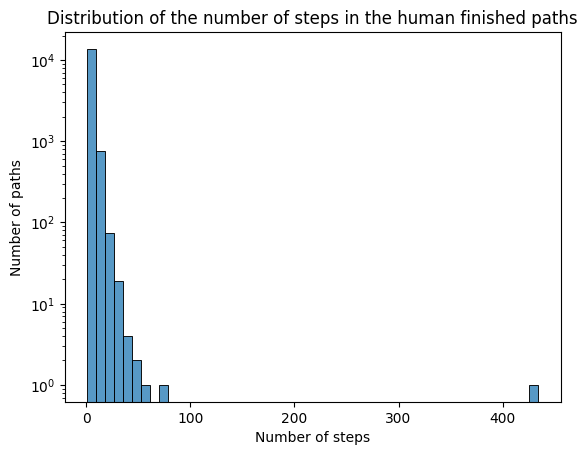

In [111]:
# plot the distribution of the number of steps in the filtered paths
sns.histplot(paths_finished_filtered['path_length'], bins=50)
plt.title('Distribution of the number of steps in the human finished paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.yscale('log')

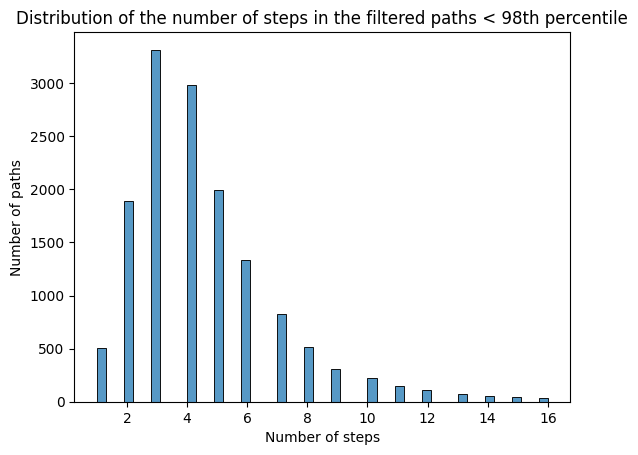

In [112]:
# get the 98th percentile of the number of steps in the filtered paths
percentile_99 = np.percentile(paths_finished_filtered['path_length'], 99)
# plot the distribution of the number of steps in the filtered paths that are less than the 98th percentile
paths_finished_filtered_lt_99 = paths_finished_filtered[paths_finished_filtered['path_length'] < percentile_99]
sns.histplot(paths_finished_filtered_lt_99['path_length'], bins=50)
plt.title('Distribution of the number of steps in the filtered paths < 98th percentile')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.show()

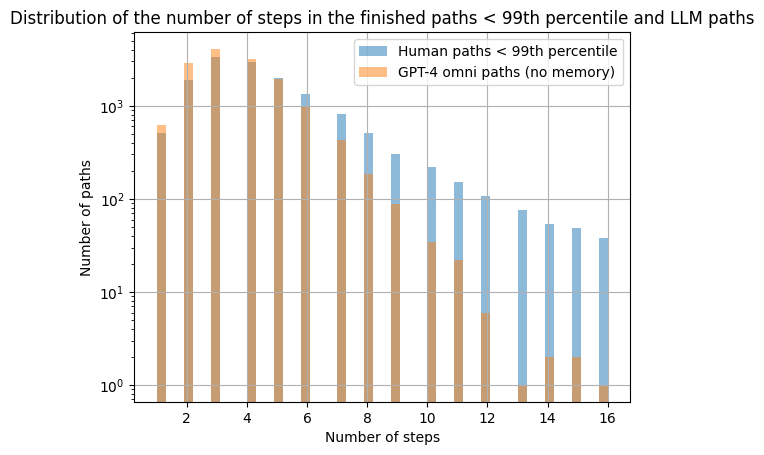

In [119]:
# compare the distribution of the number of steps in the finished paths filtered 99 percentile and the LLM paths
paths_finished_filtered_lt_99['path_length'].hist(bins=50, alpha=0.5, label='Human paths < 99th percentile')
llm_paths_all_gpt4omini_no_memory['path_length'].hist(bins=50, alpha=0.5, label='GPT-4 omni paths (no memory)')
plt.title('Distribution of the number of steps in the finished paths < 99th percentile and LLM paths')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.legend()
plt.yscale('log')
plt.show()

How does the llm work for unfinished paths?

In [56]:
DATA_FOLDER = 'data/wikispeedia_paths-and-graph/'
paths_unfinished = pd.read_csv(DATA_FOLDER + 'paths_unfinished.tsv', sep='\t', skiprows=16, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])
paths_unfinished['path'] = paths_unfinished['path'].map(urllib.parse.unquote)

In [57]:
# for each row add a column containing the pair of the first article in the path and the target article
paths_unfinished['pair'] = paths_unfinished['path'].apply(lambda x: x.split(';')[0]) + ' -> ' + paths_unfinished['target']

print(paths_unfinished.head())

    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
4  53a53bc244e08a6a  1297099105           1808   

                                   path            target     type  \
0                        Obi-Wan_Kenobi         Microsoft  timeout   
1                         Julius_Caesar           Caracas  timeout   
2  Malawi;Democracy;Alexander_the_Great     First_Crusade  timeout   
3                              Paraguay  Mount_St._Helens  restart   
4                      Paraguay;Bolivia  Mount_St._Helens  timeout   

                           pair  
0   Obi-Wan_Kenobi -> Microsoft  
1      Julius_Caesar -> Caracas  
2       Malawi -> First_Crusade  
3  Paraguay -> Mount_St._Helens  
4  Paraguay -> Mount_St._Helens  


In [58]:
# create a subset of the data by taking only one ocurrence of each pair
paths_unfinished_unique = paths_unfinished.drop_duplicates(subset='pair')

print(paths_unfinished_unique.head())


    hashedIpAddress   timestamp  durationInSec  \
0  2426091a53125110  1297054935           1804   
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
3  53a53bc244e08a6a  1297094761             49   
5  131600803df4895e  1297100557           2009   

                                                path                target  \
0                                     Obi-Wan_Kenobi             Microsoft   
1                                      Julius_Caesar               Caracas   
2               Malawi;Democracy;Alexander_the_Great         First_Crusade   
3                                           Paraguay      Mount_St._Helens   
5  Agriculture;History_of_the_world;China;Yangtze...  Grand_Canal_of_China   

      type                                 pair  
0  timeout          Obi-Wan_Kenobi -> Microsoft  
1  timeout             Julius_Caesar -> Caracas  
2  timeout              Malawi -> First_Crusade  
3  restart         Paraguay ->

In [59]:
# load the data data/paths_finished_unique.tsv
paths_finished = pd.read_csv('data/paths_finished_unique.tsv', sep='\t')

# for each row add a column containing the pair of the first article in the path and the target article
paths_finished['pair'] = paths_finished['path'].apply(lambda x: x.split(';')[0] + ' -> ' + x.split(';')[-1])

# get the paths_unfinished_unique that are not in the paths_finished_unique
mask = ~paths_unfinished_unique['pair'].isin(paths_finished['pair'])
paths_unfinished_unique_filtered = paths_unfinished_unique[mask]

print(paths_unfinished_unique_filtered.head())
# get the number of unique paths_unfinished_unique_filtered
print(paths_unfinished_unique_filtered['pair'].nunique())

# store the paths_unfinished_unique_filtered
paths_unfinished_unique_filtered.to_csv('data/paths_unfinished_unique_filtered.tsv', sep='\t', index=False)

    hashedIpAddress   timestamp  durationInSec  \
1  26141fd878806294  1297055651           1805   
2  2b015fb8181c48f2  1297090819           1818   
5  131600803df4895e  1297100557           2009   
6  486bb79910fe9dd2  1297101660           1932   
7  6d136e371e42474f  1297102070            175   

                                                path                target  \
1                                      Julius_Caesar               Caracas   
2               Malawi;Democracy;Alexander_the_Great         First_Crusade   
5  Agriculture;History_of_the_world;China;Yangtze...  Grand_Canal_of_China   
6  Mind;Christianity;Europe;Renaissance;Ancient_G...              Scouting   
7    4-2-0;United_States;Agriculture;Sugar;Australia             Cane_Toad   

      type                                 pair  
1  timeout             Julius_Caesar -> Caracas  
2  timeout              Malawi -> First_Crusade  
5  timeout  Agriculture -> Grand_Canal_of_China  
6  timeout                    

The number of loop detected  626
The number of wrong answer  248
The number of dead end  96
0        True
1        True
2        True
3       False
4       False
        ...  
1391     True
1392    False
1393    False
1394    False
1395     True
Name: finished, Length: 1396, dtype: bool
The number of finished paths  426
Percentage of loop detected  0.4484240687679083
Percentage of wrong answer  0.17765042979942694
Percentage of dead end  0.06876790830945559
Percentage of finished paths  0.30515759312320917


Text(0.5, 1.0, 'Outcome of the paths generated by LLM on unfinished paths by humans')

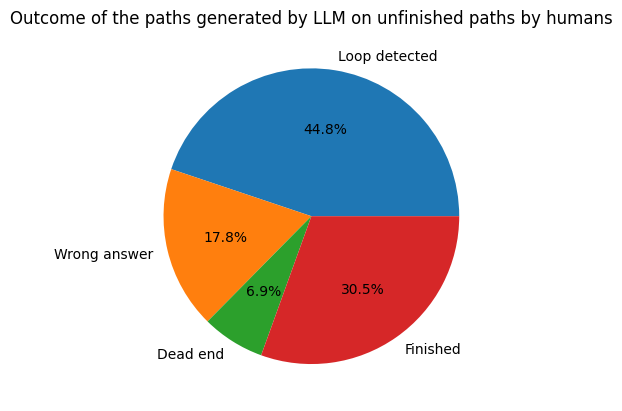

In [ ]:
# load the data/llm_paths_unfinished.tsv
llm_paths_unfinished = pd.read_csv('data/llm_on_paths_unfinished.tsv', sep='\t')

# get the number of loop_detetected
# in the path column, if the last element is LOOP_DETECTED, then it is a loop
llm_paths_unfinished['loop_detected'] = llm_paths_unfinished['path'].apply(lambda x: x.split(';')[-1] == 'LOOP_DETECTED')

# print the number of loop_detected
print("The number of loop detected ",llm_paths_unfinished['loop_detected'].sum())

# get the number of wrong_answer
# in the path column, if the last element is WRONG_ANSWER, then it is a wrong answer
llm_paths_unfinished['wrong_answer'] = llm_paths_unfinished['path'].apply(lambda x: x.split(';')[-1] == 'WRONG_ANSWER')

# print the number of wrong_answer
print("The number of wrong answer ",llm_paths_unfinished['wrong_answer'].sum())

# get the number of paths that goes to a link with dead end
# in the path column, if the last element is NO_LINK, then it is a dead end
llm_paths_unfinished['no_link'] = llm_paths_unfinished['path'].apply(lambda x: x.split(';')[-1] == 'NO_LINK')

# print the number of no_link
print("The number of dead end ",llm_paths_unfinished['no_link'].sum())

# get the number of paths that finishes i.e. there is no LOOP_DETECTED, WRONG_ANSWER or NO_LINK
llm_paths_unfinished['finished'] = ~(llm_paths_unfinished['loop_detected'] | llm_paths_unfinished['wrong_answer'] | llm_paths_unfinished['no_link'])


# print the number of finished paths
print("The number of finished paths ",llm_paths_unfinished['finished'].sum())

# print the percentage of each
print("Percentage of loop detected ",llm_paths_unfinished['loop_detected'].sum() / len(llm_paths_unfinished))
print("Percentage of wrong answer ",llm_paths_unfinished['wrong_answer'].sum() / len(llm_paths_unfinished))
print("Percentage of dead end ",llm_paths_unfinished['no_link'].sum() / len(llm_paths_unfinished))
print("Percentage of finished paths ",llm_paths_unfinished['finished'].sum() / len(llm_paths_unfinished))

labels = 'Loop detected', 'Wrong answer', 'Dead end', 'Finished'
sizes = [llm_paths_unfinished['loop_detected'].sum(), llm_paths_unfinished['wrong_answer'].sum(), llm_paths_unfinished['no_link'].sum(), llm_paths_unfinished['finished'].sum()]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Outcome of the paths generated by LLM on unfinished paths by humans')


In [116]:
# filter out the rows with 0 steps
llm_paths_unfinished = llm_paths_unfinished[llm_paths_unfinished['steps'] > 0]
# describe the data
llm_paths_unfinished['steps'].describe()

count    426.000000
mean       5.661972
std        3.545776
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       25.000000
Name: steps, dtype: float64

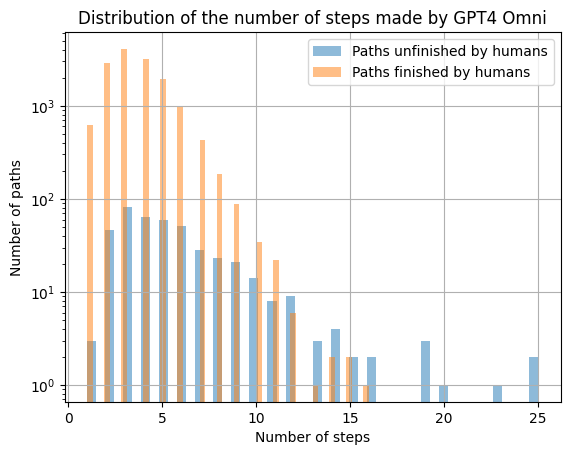

In [120]:
llm_paths_unfinished['steps'].hist(bins=50, alpha=0.5, label='Paths unfinished by humans')
llm_paths_all_gpt4omini_no_memory['path_length'].hist(bins=50, alpha=0.5, label='Paths finished by humans')
plt.title('Distribution of the number of steps made by GPT4 Omni')
plt.xlabel('Number of steps')
plt.ylabel('Number of paths')
plt.legend()
plt.yscale('log')
plt.show()

What is the distribution of the categories of articles passed by the llm or by the human?

In [61]:
# load the data/llm_paths_all_gpt4omini_no_memory.tsv
llm_paths_all_gpt4omini_no_memory = pd.read_csv('data/llm_paths_all_gpt4omini_no_memory.tsv', sep='\t')

# print the number of paths 
print("The number of paths ", len(llm_paths_all_gpt4omini_no_memory))

# get a list of all articles passed by the llm
articles = llm_paths_all_gpt4omini_no_memory['path'].apply(lambda x: x.split(';')).tolist()

# ignore the "LOOP_DETECTED", "WRONG_ANSWER" and "NO_LINK" in the articles
articles = [[article for article in article if article not in ["LOOP_DETECTED", "WRONG_ANSWER", "NO_LINK"]] for article in articles]

articles = [item for sublist in articles for item in sublist]

# get the cartegoies of the articles
categories = pd.read_csv(DATA_FOLDER + 'categories.tsv', sep='\t', skiprows=12, names=['article', 'category'])
categories = categories.map(urllib.parse.unquote)

# get the unique articles
unique_articles = list(set(articles))

# get the categories of the unique articles
unique_categories = categories[categories['article'].isin(unique_articles)]

print(unique_categories.head())

The number of paths  28718
         article                         category
10  10th_century  subject.History.General_history
11  11th_century  subject.History.General_history
12  12th_century  subject.History.General_history
13  13th_century  subject.History.General_history
14  14th_century  subject.History.General_history


In [62]:
# using the value counts, get the 0.70 quantile of the categories
categories_count = unique_categories['category'].value_counts()
categories_count.quantile(0.70)

np.float64(37.0)

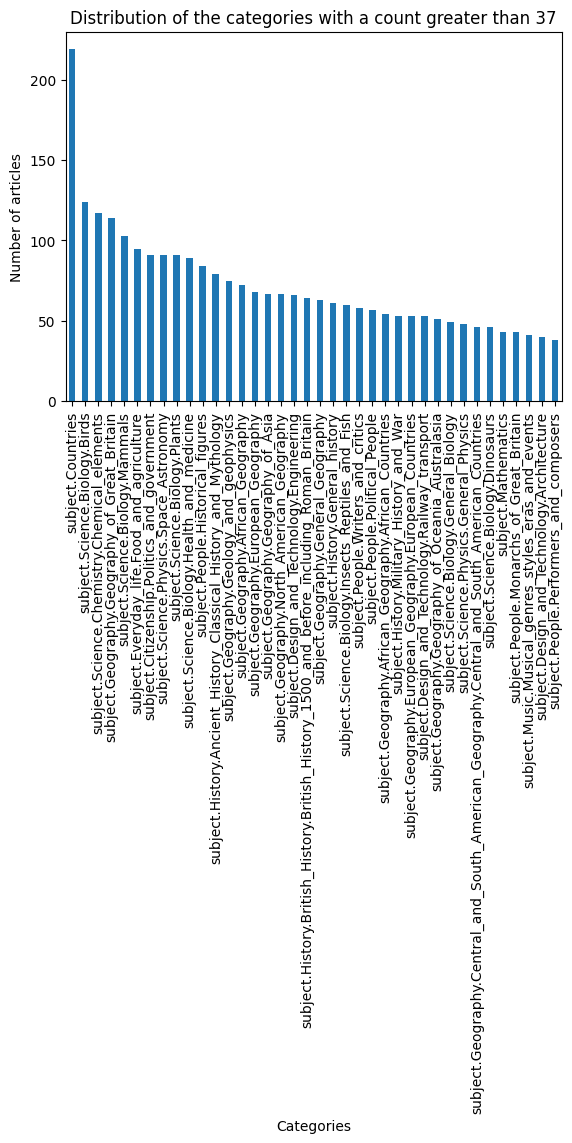

In [63]:
# plot the distribution of the categories with a count greater than 37
categories_count[categories_count > 37].plot(kind='bar')
plt.title('Distribution of the categories with a count greater than 37')
plt.xlabel('Categories')
plt.ylabel('Number of articles')
plt.show()

In [64]:
# get the articles that human goes to
# load the data/paths_finished_unique.tsv
paths_finished = pd.read_csv('data/paths_finished_unique.tsv', sep='\t')

# print the number of paths
print("The number of paths ",len(paths_finished))
# get the articles that human goes to
articles_human = paths_finished['path'].apply(lambda x: x.split(';')).tolist()

# ignore the "<" articles in the path
articles_human = [[item for item in sublist if item[0] != '<'] for sublist in articles_human]


articles_human = [item for sublist in articles_human for item in sublist]

# get the unique articles
unique_articles_human = list(set(articles_human))

# get the categories of the unique articles
unique_categories_human = categories[categories['article'].isin(unique_articles_human)]

# using the value counts, get the 0.70 quantile of the categories
categories_count_human = unique_categories_human['category'].value_counts()
nbr = categories_count_human.quantile(0.70)

FileNotFoundError: [Errno 2] No such file or directory: 'data/paths_finished_unique.tsv'

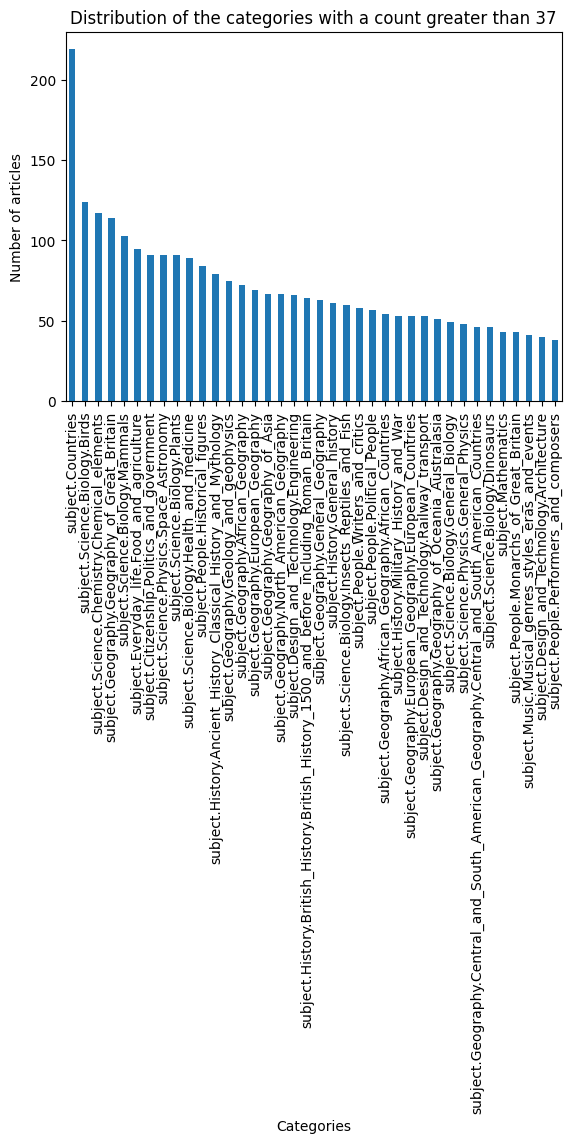

In [151]:
# plot the distribution of the categories with a count greater than nbr
categories_count_human[categories_count_human > nbr].plot(kind='bar')
plt.title('Distribution of the categories with a count greater than 37')
plt.xlabel('Categories')
plt.ylabel('Number of articles')
plt.show()

category
subject.Countries                               219
subject.Science.Biology.Birds                   124
subject.Science.Chemistry.Chemical_elements     117
subject.Geography.Geography_of_Great_Britain    114
subject.Science.Biology.Mammals                 103
Name: count, dtype: int64
category
subject.Countries                               219
subject.Science.Biology.Birds                   124
subject.Science.Chemistry.Chemical_elements     117
subject.Geography.Geography_of_Great_Britain    114
subject.Science.Biology.Mammals                 103
Name: count, dtype: int64


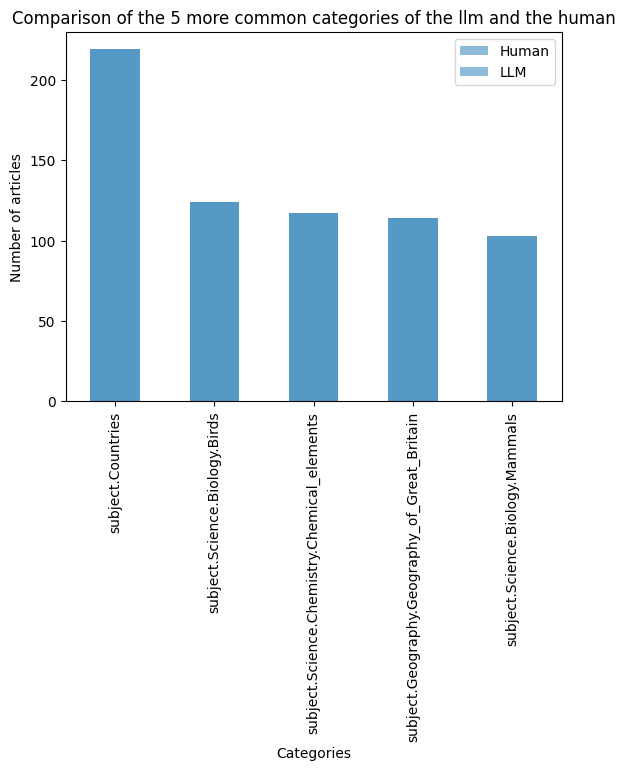

In [152]:
# compare the 5 more common categories of the llm and the human
categories_count_human = categories_count_human.sort_values(ascending=False)
categories_count_human = categories_count_human[:5]
categories_count = categories_count.sort_values(ascending=False)
categories_count = categories_count[:5]

print(categories_count_human)
print(categories_count)

categories_count_human.plot(kind='bar', alpha=0.5, label='Human')
categories_count.plot(kind='bar', alpha=0.5, label='LLM')
plt.title('Comparison of the 5 more common categories of the llm and the human')
plt.xlabel('Categories')
plt.ylabel('Number of articles')
plt.legend()
plt.show()

Now we compare the articles passed by the llm and the human. Does the llm pass more articles than the human?

The number of unique articles human  4168


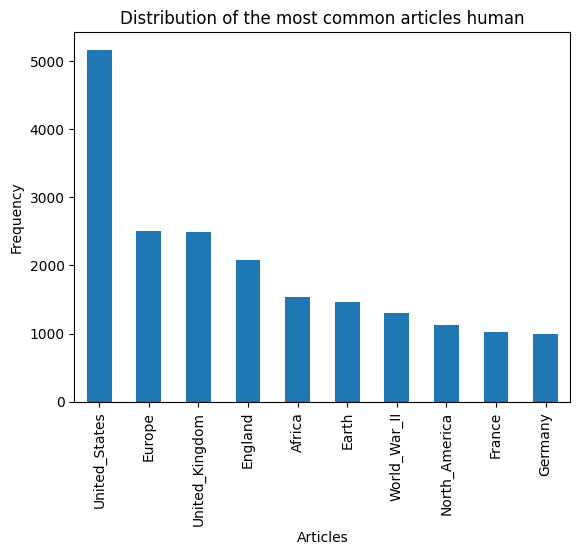

The number of unique articles llm  4148


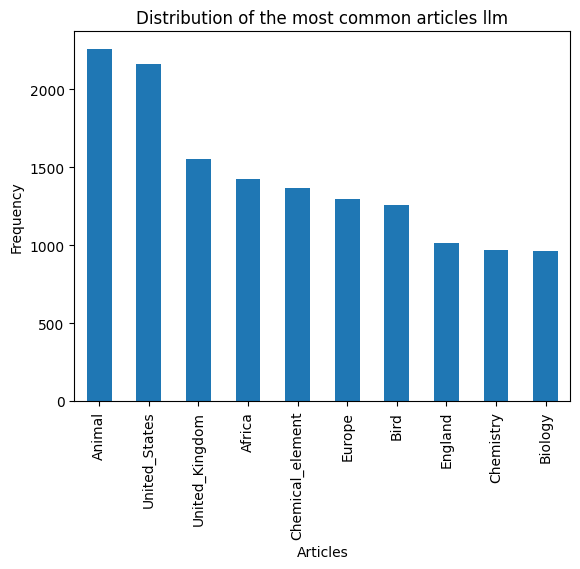

In [153]:
# get the articles that human goes to
# plot the distribution of the unique_articles_human
unique_articles_human_series = pd.Series(unique_articles_human)

# print the number of unique articles human
print("The number of unique articles human ",len(unique_articles_human_series))

# Plot the distribution of the most common articles
articles_count_h = pd.Series(articles_human)
articles_count_h = articles_count_h.value_counts()
articles_count_h = articles_count_h.sort_values(ascending=False)
articles_count_h = articles_count_h[:10]
articles_count_h.plot(kind='bar')
plt.title('Distribution of the most common articles human')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()


# get the articles that llm goes to
# plot the distribution of the unique_articles
unique_articles_series = pd.Series(unique_articles)

# print the number of unique articles llm
print("The number of unique articles llm ",len(unique_articles_series))

# Plot the distribution of the most common articles
articles_count = pd.Series(articles)
articles_count = articles_count.value_counts()
articles_count = articles_count.sort_values(ascending=False)
articles_count = articles_count[:10]
articles_count.plot(kind='bar')
plt.title('Distribution of the most common articles llm')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()



United_States     5163
Europe            2502
United_Kingdom    2489
England           2073
Africa            1537
Earth             1456
World_War_II      1305
North_America     1128
France            1026
Germany            990
Name: count, dtype: int64
Animal              2259
United_States       2161
United_Kingdom      1553
Africa              1427
Chemical_element    1368
Europe              1295
Bird                1257
England             1013
Chemistry            968
Biology              966
Name: count, dtype: int64
the number of articles passes from human 19669
14267


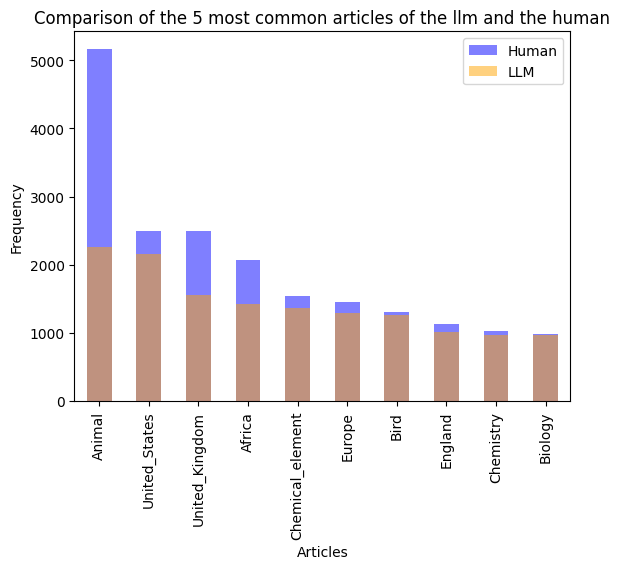

In [154]:
# plot a comparison of the 10 most common articles of the llm and the human

print(articles_count_h)
print(articles_count)

print("the number of articles passes from human", articles_count_h.sum())
print(articles_count.sum())

articles_count_h.plot(kind='bar', alpha=0.5, color = 'blue', label='Human')
articles_count.plot(kind='bar', alpha=0.5, color = 'orange', label='LLM')
plt.title('Comparison of the 5 most common articles of the llm and the human')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.legend()
plt.show()